<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Traitementdonnes_practice_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice traitement de données oragnisation d'un jeu de données

A partir d'un je de données complet, vous aller devoir créer une matrice masquée comprenant les information suivante : 
* Un découpage de la matrice horaire en uune matrice journalière pour les 365 premier jours
* Le calcul de la moyenne spatial de la matrie créée, présenté sous forme de carte avec latitutes et longitues en x et y 
* Une série temporelle de la valeur moyenne par jour avec en x les dates correspondantes 
* Proposer une série glissante des cartes journalières
* Utiliser la matrice de nuages fournis pour créer une matrice masquée sur les 1461 jours
* Les mêmes calculs statistiques et graphiques avec la nouvelles matrice nuage 


## Importation des données 

In [ ]:
import numpy as np
dataset  = np.load("/home/vient/These/Data/Data_ZOI/dataset_ZOI.npy",allow_pickle='TRUE').item()
dataH    = dataset['data_Hourly']
mask     = dataset['Cloud_daily']
lat_grid = dataset['Lat']
lon_grid = dataset['Lon']

## Découpage des données horaires en journalières

In [ ]:
def prepdata(xH):
    xD=np.empty((xH.shape[0]//24,xH.shape[1],xH.shape[2]))
    for i in range(len(xD)):
        xD[i]=xH[12+i*24]
    
    return xD

In [ ]:
dataD=prepdata(dataH)

In [ ]:
print(dataH.shape)
print(dataD.shape)

(35064, 64, 64)
(1461, 64, 64)


## Moyenne temporelle avec affichage de la date 

100%|██████████| 1461/1461 [00:00<00:00, 9978.10it/s]


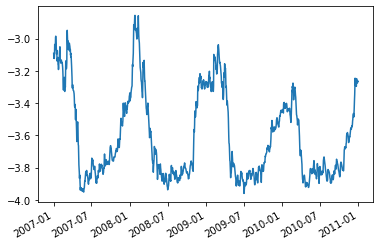

In [ ]:
#moyenne temporelle ( une valeur de moyenne par jour )
import matplotlib.pyplot as plt
from tqdm import tqdm
tempmean=np.zeros(len(dataD))
for i in tqdm(range(len(dataD))) :
    tempmean[i]=np.nanmean(dataD[i])
x=np.arange("2007-01-01",np.datetime64('2007-01-01')+np.timedelta64(1461, 'D'))  
fig,ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(x,tempmean)

## Moyenne spatiale avec affichage des lat et lon 

<ipython-input-10-d4b009c697e6>:5: RuntimeWarning: Mean of empty slice
  spacemean[i,j] = np.nanmean(dataH[:,i,j])
<ipython-input-10-d4b009c697e6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(-xlon[::8])
<ipython-input-10-d4b009c697e6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylat[::8])


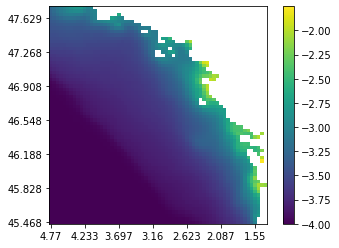

In [ ]:
#moyenne spatiale( une valeur de moyenne par points de la carte sur 1461 jours )
spacemean=np.zeros((dataH.shape[1],dataH.shape[1]),)
for i in range(dataH.shape[1]):
    for j in range(dataH.shape[2]):
        spacemean[i,j] = np.nanmean(dataH[:,i,j])
# Péparation des matrices lat et lon pour les palcer en x et y
ylat     = np.round(lat_grid[:,0],3)
xlon     = np.round(lon_grid[0,:],3)
#Generation de la figure 
fig,ax = plt.subplots()
ax.set_xticklabels(-xlon[::8])
ax.set_yticklabels(ylat[::8])
plt.imshow(spacemean,origin='lower')
plt.colorbar()

In [ ]:
def plotmap(t):
    fig,ax = plt.subplots()
    fig,ax = plt.subplots()
    ax.set_xticklabels(-xlon[::8])
    ax.set_yticklabels(ylat[::8])
    plt.imshow(dataH[t],origin='lower')
    plt.colorbar()

<ipython-input-12-5981cb663b7e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(-xlon[::8])
<ipython-input-12-5981cb663b7e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylat[::8])


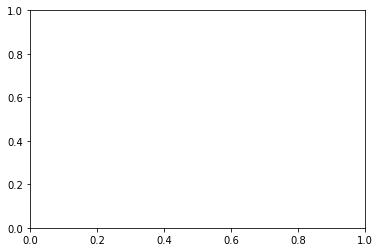

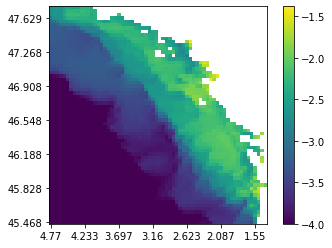

In [ ]:
from ipywidgets import interactive
interactive_plot = interactive(plotmap, t=(0,dataH.shape[0]))
output = interactive_plot.children[-1]
interactive_plot

## Création de la martice masque

In [ ]:
print(mask[0],mask.shape)

[[ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [nan  0.  0. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] (365, 64, 64)


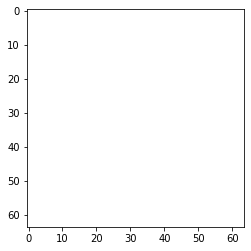

In [ ]:
#f usion des matrices mask et données 
datafusion=np.copy(dataD)
datafusion[-365:]=dataD[-365:]+mask
# verifions si les données sont bien absentes 
plt.imshow(datafusion[-364])

In [ ]:
# creation de la matrice masque
Datamask = np.ma.masked_invalid(datafusion)

In [ ]:
Datamask.shape

(1461, 64, 64)

## Comparaison avec dataset inital

 32%|███▏      | 474/1461 [00:00<00:00, 4737.81it/s]<ipython-input-48-ad9a710c2b77>:5: RuntimeWarning: Mean of empty slice
  tempmeanmask[i]=np.nanmean(Datamask.data[i])
100%|██████████| 1461/1461 [00:00<00:00, 7778.36it/s]


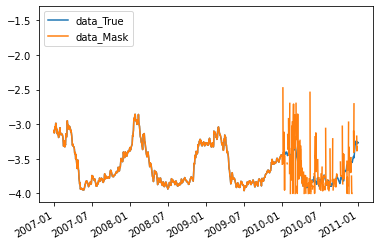

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
tempmeanmask=np.zeros(len(dataD))
for i in tqdm(range(len(dataD))) :
    tempmeanmask[i]=np.nanmean(Datamask.data[i])
x=np.arange("2007-01-01",np.datetime64('2007-01-01')+np.timedelta64(1461, 'D'))  
fig,ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(x,tempmean,label='data_True')
plt.plot(x,tempmeanmask,label='data_Mask')
plt.legend()

<ipython-input-74-7b50edd793b2>:5: RuntimeWarning: Mean of empty slice
  spacemeanmask[i,j] = np.nanmean(Datamask.data[:,i,j])
<ipython-input-74-7b50edd793b2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(-xlon[::8])
<ipython-input-74-7b50edd793b2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylat[::8])
<ipython-input-74-7b50edd793b2>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(-xlon[::8])


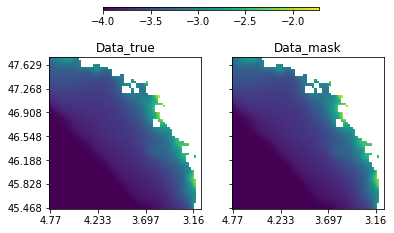

In [ ]:
#moyenne spatiale( une valeur de moyenne par points de la carte sur 1461 jours )
spacemeanmask=np.zeros((dataH.shape[1],dataH.shape[1]),)
for i in range(dataH.shape[1]):
    for j in range(dataH.shape[2]):
        spacemeanmask[i,j] = np.nanmean(Datamask.data[:,i,j])
# Péparation des matrices lat et lon pour les palcer en x et y
ylat     = np.round(lat_grid[:,0],3)
xlon     = np.round(lon_grid[0,:],3)
#Generation de la figure 
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xticklabels(-xlon[::8])
ax1.set_yticklabels(ylat[::8])
ax1.set_title('Data_true')
ax1.imshow(spacemean,origin='lower')
ax2.set_xticklabels(-xlon[::8])
ax2.set_yticklabels([])
ax2.set_title('Data_mask')
ax2.imshow(spacemeanmask,origin='lower')
color=ax1.imshow(spacemeanmask,origin='lower')
fig.colorbar(color,cax = fig.add_axes([0.25,0.93,0.5,0.01]),orientation="horizontal")

Vous remarquer que malgré la différence en moyenne temporelles, la 